In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

In [8]:
credit=pd.read_csv("C:\\Users\\nthambat\\Downloads\\GE\\Downloads\DS\creditcard.csv",index_col=False)
credit.drop(["age"],inplace=True,axis = 1)
credit.head()

,Unnamed: 0,card,reports,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [10]:
credit.drop(["Unnamed: 0"],inplace=True,axis = 1)

In [12]:
labelEncoder=LabelEncoder() 

In [13]:
credit['owner']=labelEncoder.fit_transform(credit['owner'])
credit['selfemp']=labelEncoder.fit_transform(credit['selfemp'])
credit['card']=labelEncoder.fit_transform(credit['card'])

In [14]:
y=credit.iloc[:,0]
x=credit.iloc[:,1:-1]

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt 
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)
y_pred = classifier.predict(x)

C:\Users\nthambat\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.1780783  0.02327673 0.36700117 0.37314361 0.01046605 0.00427513
 0.00934029 0.02867902 0.00573968]


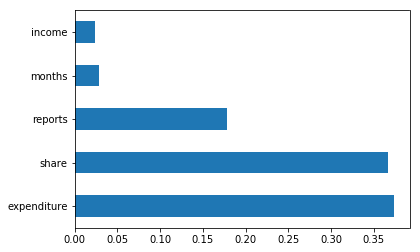

In [17]:
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[ 296    0]
 [  23 1000]]
